In [2]:
# Code from https://towardsdatascience.com/image-processing-with-python-application-of-fourier-transformation-5a8584dc175b
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist



In [3]:
dark_image = imread('against_the_light.png')


In [ ]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray')


In [ ]:
dark_image = imread('against_the_light.png')


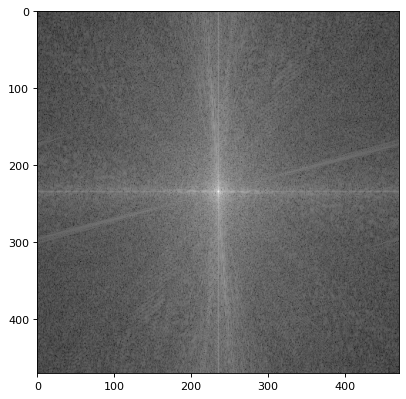

In [5]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')


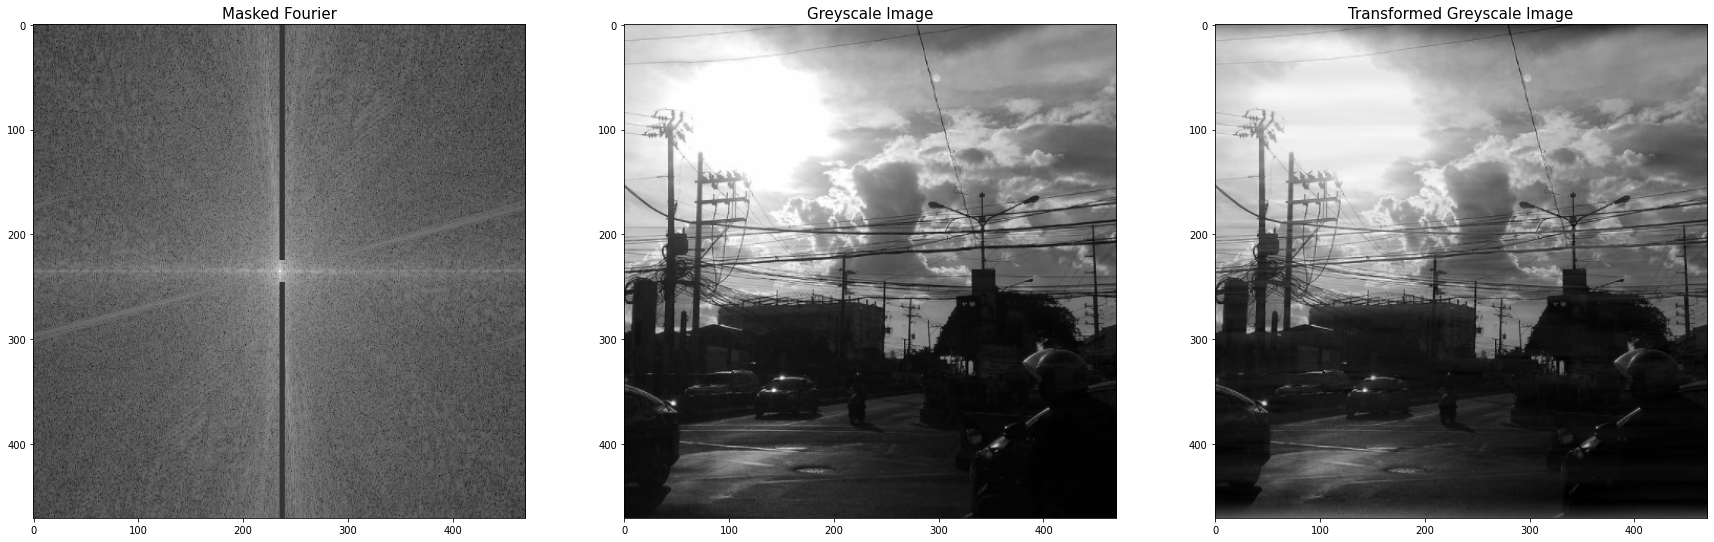

In [9]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:, 235:240] = i
    fig, ax = plt.subplots(1, 3, figsize=(30, 30))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize=f_size)
    ax[1].imshow(rgb2gray(image), cmap='gray')
    ax[1].set_title('Greyscale Image', fontsize=f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)),
                 cmap='gray')
    ax[2].set_title('Transformed Greyscale Image',
                    fontsize=f_size)


fourier_masker_ver(dark_image, 1)


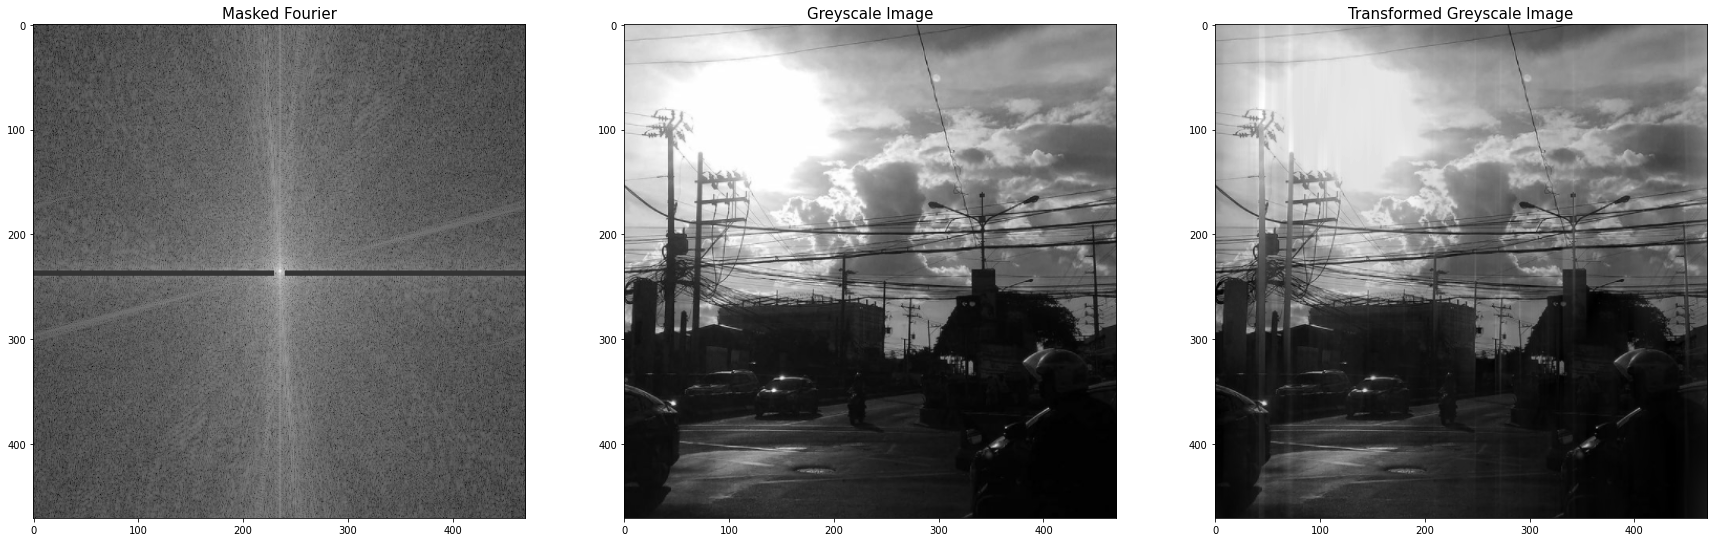

In [11]:
def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[235:240, :230] = i
    dark_image_grey_fourier[235:240, -230:] = i
    fig, ax = plt.subplots(1, 3, figsize=(30, 30))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize=f_size)
    ax[1].imshow(rgb2gray(image), cmap='gray')
    ax[1].set_title('Greyscale Image', fontsize=f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)),
                 cmap='gray')
    ax[2].set_title('Transformed Greyscale Image',
                    fontsize=f_size)


fourier_masker_hor(dark_image, 1)
